---
# Validation of best model
---
In this notebook, we will be validating the best model on the validation dataset.


## Results

---

### Importing necessary library

In [31]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

import joblib

### Read data file

In [7]:
churn_df = pd.read_excel('../data/churn_cleaned_featEng.xlsx')
churn_df

,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Internet Service_Fiber optic,Internet Service_No,...,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Gender_Male,Phone Service_Yes,Multiple Lines_Yes,Streaming TV_Yes,Streaming Movies_Yes
0,33.964131,118.272783,2,53.85,1,0,0,0,0,0,...,0,1,0,0,1,1,1,0,0,0
1,34.059281,118.307420,2,70.70,1,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0
2,34.048013,118.293953,8,99.65,1,0,0,1,1,0,...,0,1,0,1,0,0,1,1,1,1
3,34.062125,118.315709,28,104.80,1,0,1,1,1,0,...,0,1,0,1,0,0,1,1,1,1
4,34.039224,118.266293,49,103.70,1,0,0,1,1,0,...,0,1,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,34.341737,116.539416,72,21.15,0,0,0,0,0,1,...,1,1,0,0,0,0,1,0,0,0
7039,34.667815,117.536183,24,84.80,0,0,1,1,0,0,...,0,1,0,0,1,1,1,1,1,1
7040,34.559882,115.637164,72,103.20,0,0,1,1,1,0,...,0,1,1,0,0,0,1,1,1,1
7041,34.167800,116.864330,11,29.60,0,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0


---

<center>
    
## Preparing data

</center>

---

### Separate X and y features

In [8]:
# Seperate X and y features
X = churn_df.drop(columns=['Churn Value'])
y = churn_df['Churn Value']

### Split dataset (training/testing/validation)

In [11]:
# Separating the dataset into a training dataset (80%) and testing+validation (20%) dataset
X_train, X_test_validation, y_train, y_test_validation = train_test_split(X, y, train_size=0.8, random_state=5)

# Separating the testing+valisation dataset into a testing dataset (10%) and a validation dataset (10%) 
X_val, X_test, y_val, y_test = train_test_split(X_test_validation, y_test_validation, test_size=0.5, random_state=5)


### Converting data subset to dataframe 

In [14]:
X_val = pd.DataFrame(X_val, columns=X.columns)

---

<center>
    
## Using best model on validation dataset

</center>

---

### Loading the best model

In [21]:
# Load the model and preprocessors (if saved)
balanced_model = joblib.load("../model/best_balanced_model.joblib")
balanced_scaler = joblib.load("../model/best_balanced_model_scaler.joblib")

### Applying model's scaling to the validation dataset

In [22]:
X_val_scaled = balanced_scaler.transform(X_val)

### Using the model to make a prediction on the validation dataset

In [24]:
y_pred_bal = balanced_model.predict(X_val_scaled)

---

<center>
    
## Evaluating best model's performance

</center>

---

### Accuracy Scores

In [25]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_val, y_pred_bal)))


Model accuracy score: 0.7429


In [33]:
cm = confusion_matrix(y_val, y_pred_bal)
cm

array([[386, 152],
       [ 29, 137]])

In [34]:
# Classification report

print(classification_report(y_val, y_pred_bal))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       538
           1       0.47      0.83      0.60       166

    accuracy                           0.74       704
   macro avg       0.70      0.77      0.71       704
weighted avg       0.82      0.74      0.76       704



### Plot of Confusion Matrix

In [35]:
# Retrieve classes' name
true = balanced_model.classes_[0]
false = balanced_model.classes_[1]

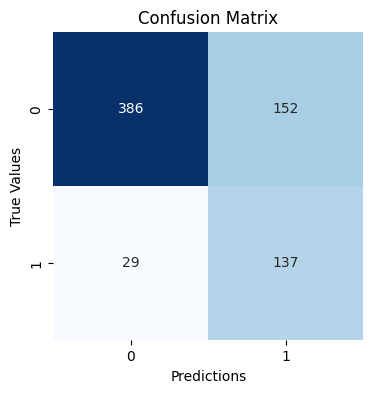

In [41]:
# Create visualization for the confusion Matrix

# Create figure and adjsut its size
plt.figure(figsize=(4,4))

# Create heatmap
ax = sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Blues')

# Add Title
ax.set_title('Confusion Matrix')

# Adjust ticks labels
ax.set_xticklabels(labels=[true, false])
ax.set_yticklabels(labels=[true, false])

# Adjust axis labels
ax.set_xlabel(xlabel='Predictions')
ax.set_ylabel(ylabel='True Values')

# Save plot
plt.savefig('../graph/ConfusionMatrix_val_BalancedModel.png')

# Show plot
plt.show()

---

<center>
    
## Converting Churn Score to Churn Value

</center>

---

### Read data file

In [43]:
orig_df = pd.read_excel('../data/churn.xlsx')
orig_df.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.850000,108.150000,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.700000,151.650000,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.650000,820.500000,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.800000,3046.050000,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.700000,5036.300000,Yes,1,89,5340,Competitor had better devices


### Keep Churn Score for index matching the validation dataset

In [46]:
churn_score = orig_df['Churn Score'].iloc[X_val.index]
churn_score

608     99
1445    67
6601    31
1498    94
69      80
        ..
2433    46
4835    37
4639    62
2239    76
1791    92
Name: Churn Score, Length: 704, dtype: int64

### Converting to binary forecast 
(0 for less than or equal to 50, 1 for greater than 50)

In [48]:
threshold = 50

churn_score_bin = (churn_score >= threshold).astype(int)

churn_score_bin

608     1
1445    1
6601    0
1498    1
69      1
       ..
2433    0
4835    0
4639    1
2239    1
1791    1
Name: Churn Score, Length: 704, dtype: int64

In [49]:
cm = confusion_matrix(y_val, churn_score_bin)
cm

array([[261, 277],
       [  0, 166]])

In [35]:
# Retrieve classes' name
true = balanced_model.classes_[0]
false = balanced_model.classes_[1]

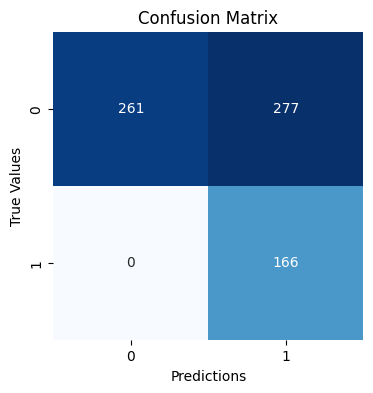

In [51]:
# Create visualization for the confusion Matrix

# Create figure and adjsut its size
plt.figure(figsize=(4,4))

# Create heatmap
ax = sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Blues')

# Add Title
ax.set_title('Confusion Matrix')

# Adjust ticks labels
ax.set_xticklabels(labels=[true, false])
ax.set_yticklabels(labels=[true, false])

# Adjust axis labels
ax.set_xlabel(xlabel='Predictions')
ax.set_ylabel(ylabel='True Values')

# Save plot
plt.savefig('../graph/ConfusionMatrix_val_ChurnScore.png')

# Show plot
plt.show()

In [50]:
# Classification report

print(classification_report(y_val, churn_score_bin))

              precision    recall  f1-score   support

           0       1.00      0.49      0.65       538
           1       0.37      1.00      0.55       166

    accuracy                           0.61       704
   macro avg       0.69      0.74      0.60       704
weighted avg       0.85      0.61      0.63       704



---

<center>
    
##  Results Best model's performance

</center>

---

| Balanced Model</br>DecisionTreeClassifier              | Balanced Model</br>Random Forest                  | Client pre-existing model</br> Churn Score               |
|-----------------------|-----------------------|-----------------------|
| ![Confusion Matrix Balanced Model](../graph/ConfusionMatrix_val_BalancedModel.png) | ![Confusion Matrix Balanced Model](../graph/ConfusionMatrix_val_BalancedModel.png) |  ![Confusion Matrix Balanced Model](../graph/ConfusionMatrix_val_ChurnScore.png) | 

<table style="display:inline-block; margin-right: 10px;">
  <caption><strong>Balanced Model</br>DecisionTreeClassifier </strong></caption>
  <tr>
    <th>Metric</th>
    <th>Class 0</th>
    <th>Class 1</th>
    <th>Accuracy</th>
    <th>Macro Avg</th>
    <th>Weighted Avg</th>
  </tr>
  <tr>
    <td>Precision</td>
    <td>0.93</td>
    <td>0.47</td>
    <td>-</td>
    <td>0.70</td>
    <td>0.82</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>0.72</td>
    <td>0.83</td>
    <td>-</td>
    <td>0.77</td>
    <td>0.74</td>
  </tr>
  <tr>
    <td>F1-Score</td>
    <td>0.81</td>
    <td>0.60</td>
    <td>0.74</td>
    <td>0.71</td>
    <td>0.76</td>
  </tr>
  <tr>
    <td>Support</td>
    <td>538</td>
    <td>166</td>
    <td>704</td>
    <td>704</td>
    <td>704</td>
  </tr>
</table>

<table style="display:inline-block; margin-right: 10px;">
  <caption><strong>Balanced Model</br>Random Forest </strong></caption>
  <tr>
    <th>Metric</th>
    <th>Class 0</th>
    <th>Class 1</th>
    <th>Accuracy</th>
    <th>Macro Avg</th>
    <th>Weighted Avg</th>
  </tr>
  <tr>
    <td>Precision</td>
    <td>0.86</td>
    <td>0.66</td>
    <td>-</td>
    <td>0.76</td>
    <td>0.81</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>0.90</td>
    <td>0.57</td>
    <td>-</td>
    <td>0.73</td>
    <td>0.81</td>
  </tr>
  <tr>
    <td>F1-Score</td>
    <td>0.88</td>
    <td>0.61</td>
    <td>0.81</td>
    <td>0.74</td>
    <td>0.81</td>
  </tr>
  <tr>
    <td>Support</td>
    <td>783</td>
    <td>274</td>
    <td>1057</td>
    <td>1057</td>
    <td>1057</td>
  </tr>
</table>

<table style="display:inline-block;">
  <caption><strong>Client pre-existing model</br> Churn Score</strong></caption>
  <tr>
    <th>Metric</th>
    <th>Class 0</th>
    <th>Class 1</th>
    <th>Accuracy</th>
    <th>Macro Avg</th>
    <th>Weighted Avg</th>
  </tr>
  <tr>
    <td>Precision</td>
    <td>1.00</td>
    <td>0.37</td>
    <td>-</td>
    <td>0.69</td>
    <td>0.85</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>0.49</td>
    <td>1.00</td>
    <td>-</td>
    <td>0.74</td>
    <td>0.61</td>
  </tr>
  <tr>
    <td>F1-Score</td>
    <td>0.65</td>
    <td>0.55</td>
    <td>0.61</td>
    <td>0.60</td>
    <td>0.63</td>
  </tr>
  <tr>
    <td>Support</td>
    <td>538</td>
    <td>166</td>
    <td>704</td>
    <td>704</td>
    <td>704</td>
  </tr>
</table>
